<a href="https://colab.research.google.com/github/Angshuman-nits/ML_Projects/blob/main/MallKmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

HENCE NO NULL VALUES ARE PRESENT

In [6]:
df[df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


NO DUPLICATE VALUES

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
import seaborn as sns
from sklearn.cluster import KMeans


In [9]:
df.shape

(200, 5)

In [11]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
#here only annual income and spending score is reqd...customer ID,gender age doesn't matter

In [14]:
x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

***CHOOSING THE CORRECT NUMBER OF CLUSTERS***

here we'll use a parameter:
WCSS->within clusters sum of squares

In [15]:
#ELBOW METHOD WE'RE USING ACTUALLY

In [21]:
from sklearn.cluster import KMeans
import seaborn as sns

In [22]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [20]:
#LETS PLOT THE ELBOW GRAPH

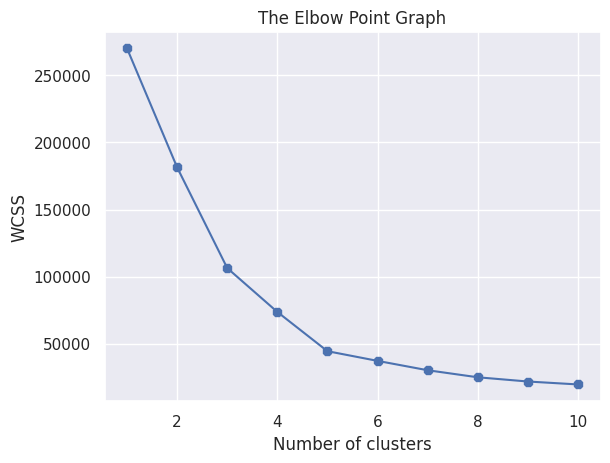

In [41]:
sns.set()
plt.plot(range(1,11),wcss,marker="8")
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

***HERE WE'VE TWO ELBOW POINTS..WE'LL CONSIDER THE LARGER VALUE ON X AXIS(here 5)***

In [24]:
#hence clusters=5

***Training the model***

In [29]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
#let's give the each of the 5 clusters individual labels[0,1,2,3,4]

In [30]:
y=kmeans.fit_predict(x)
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

***Visualizing the clusters:plotting all the 5 clusters and their centroid***

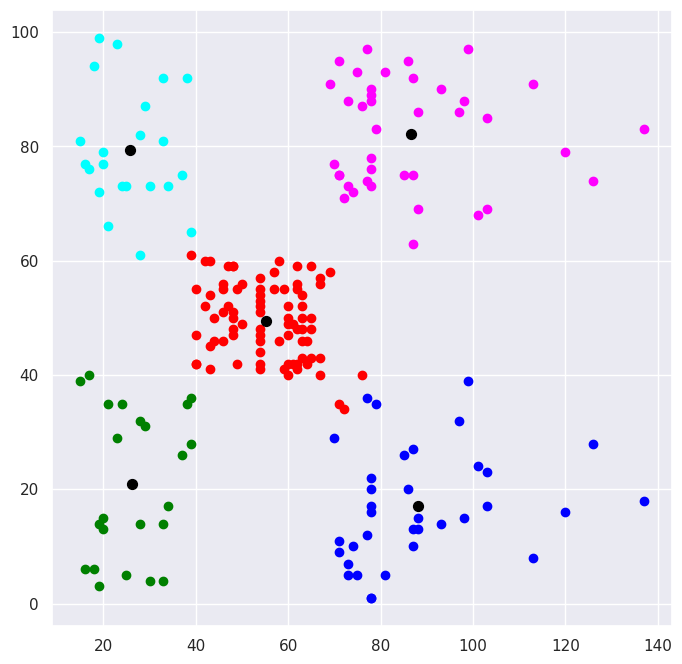

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],c='red',label='Cluster1')
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label='Cluster2')
plt.scatter(x[y==2,0],x[y==2,1],c='green',label='Cluster3')
plt.scatter(x[y==3,0],x[y==3,1],c='cyan',label='Cluster4')
plt.scatter(x[y==4,0],x[y==4,1],c='magenta',label='Cluster5')

#plot the centroids of each of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=70,c='black',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

***LET US CONSIDER AGE ALSO THIS TIME***

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
x1=df.iloc[:,[2,3,4]].values
x1

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [38]:
wcss1=[]
for i in range(1,11):
  kmeans1=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans1.fit(x1)
  wcss1.append(kmeans1.inertia_)

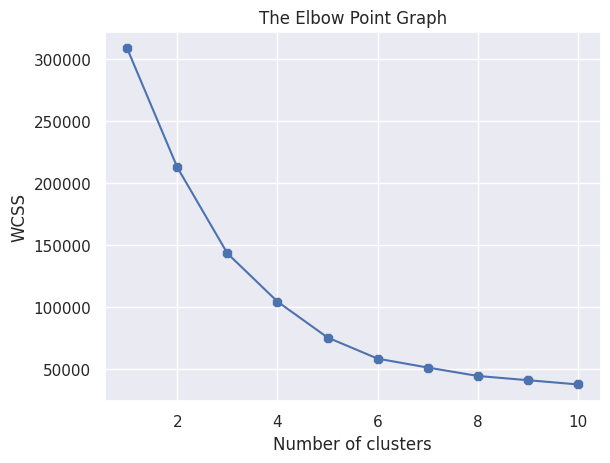

In [40]:
#plot the elbow graph
sns.set()
plt.plot(range(1,11),wcss1,marker="8")
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
#number of clusters=5

In [43]:
kmeans1=KMeans(n_clusters=5,init='k-means++',random_state=42)
y1=kmeans1.fit_predict(x1)
y1

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

***Visualizing the clusters:plotting all the 5 clusters and their centroid***

In [49]:
df["cluster_number"]=y1 #adding a new column to df
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster_number
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,4,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,4,4
4,5,Female,31,17,40,0,0


In [66]:
from mpl_toolkits.mplot3d import Axes3D

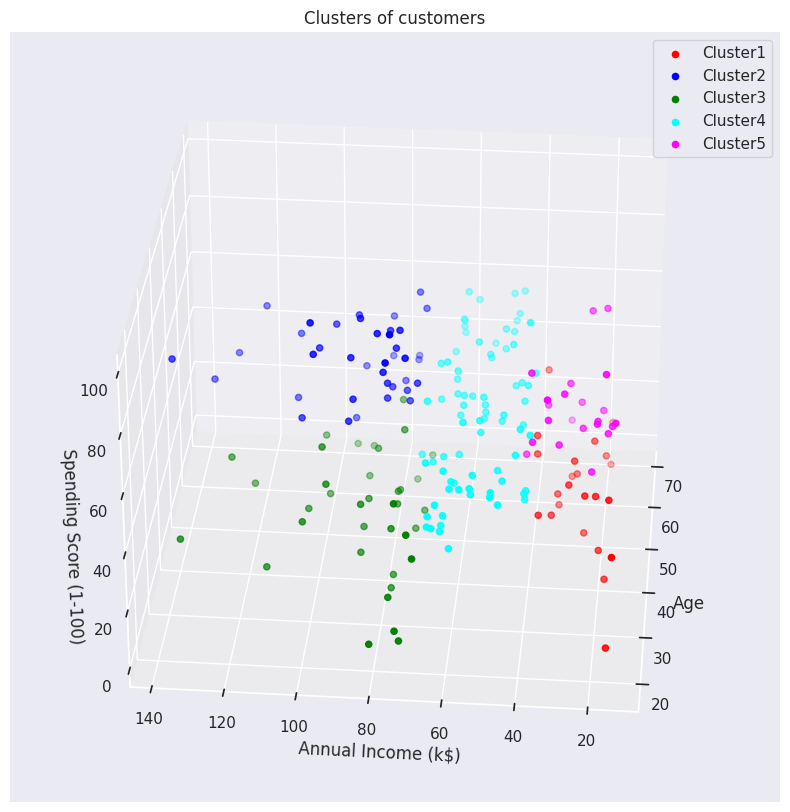

In [68]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.cluster_number==0],df["Annual Income (k$)"][df.cluster_number==0],df["Spending Score (1-100)"][df.cluster_number==0],c='red',label='Cluster1')
ax.scatter(df.Age[df.cluster_number==1],df["Annual Income (k$)"][df.cluster_number==1],df["Spending Score (1-100)"][df.cluster_number==1],c='blue',label='Cluster2')
ax.scatter(df.Age[df.cluster_number==2],df["Annual Income (k$)"][df.cluster_number==2],df["Spending Score (1-100)"][df.cluster_number==2],c='green',label='Cluster3')
ax.scatter(df.Age[df.cluster_number==3],df["Annual Income (k$)"][df.cluster_number==3],df["Spending Score (1-100)"][df.cluster_number==3],c='cyan',label='Cluster4')
ax.scatter(df.Age[df.cluster_number==4],df["Annual Income (k$)"][df.cluster_number==4],df["Spending Score (1-100)"][df.cluster_number==4],c='magenta',label='Cluster5')
ax.view_init(30,185)
ax.set_title('Clusters of customers')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()